#### Morphological Operations

Transformações morfológicas são operações simples feitas na imagem baseadas em seu formato. É geralmente feita em imagens binárias. Para essa operação são necessárias duas coisas: uma imagem e um elemento estrutural ou kernel. As duas operações morfológicas básicas são Erosão e Dilatação. Então, há combinações como Abertura, Fechamento, Gradiente etc.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def exibe_image(img, gray=True):
    
    if gray:
        plt.imshow(img, cmap = 'gray')
    else:
        plt.imshow(img)
    
    plt.axis('off')
    plt.show()

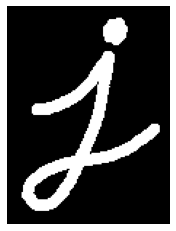

In [3]:
# erosão

img = cv2.imread('morph_example.png', 0)
exibe_image(img)

A ideia básica de erosão é bem similar a sua ideia física, é uma operação que vai erodir as fronteiras de um objeto.
Todos os pixels próximos a uma fronteira serão descartados dependendo do tamanho do kernel. Assim, a grossura de um objeto diminui. É útil para remover pequenos ruídos brancos, separar dois objetos, etc.

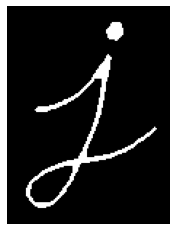

In [4]:
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img, kernel)

exibe_image(img_erosion)

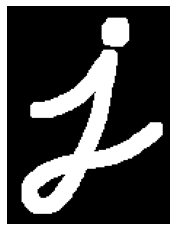

In [5]:
# dilatação

kernel_dilation = np.ones((8,8), np.uint8)

dilation = cv2.dilate(img_erosion, kernel_dilation)

exibe_image(dilation)

É o oposto de erosão. Nesse caso, um pixel será 1 se pelo menos um dos pixels no kernel for 1. Assim, ele aumenta a fronteira do objeto. Geralmente, em casos de remoção de ruído, erosão é seguida de dilatação. O motivo é que erosão irá remover o ruído de brancos, mas também diminui o tamanho do nosso objeto.

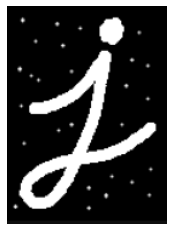

In [6]:
# abertura

img = cv2.imread('morph_open.png', 0)

exibe_image(img)

Abertura é apenas um nome para erosão seguida de dilatação, como discutimos acima. 



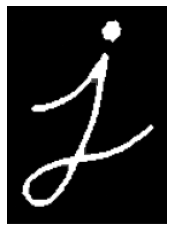

In [7]:
kernel = np.ones((5,5), dtype = np.uint8)

opening = cv2.erode(img, kernel)

exibe_image(opening)

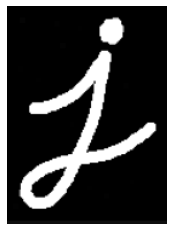

In [8]:
opening = cv2.dilate(opening, kernel)

exibe_image(opening)

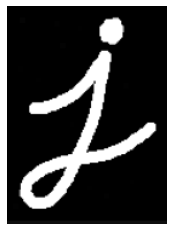

In [9]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

exibe_image(opening)

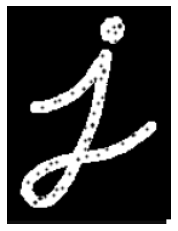

In [10]:
# fechamento

img = cv2.imread('morph_close.png', 0)

exibe_image(img)

Fechamento é o inverso de Abertura: dilatação seguindo de erosão. É útil para preencher pequenos buracos dentro de objetos.

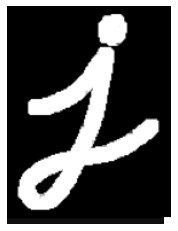

In [11]:
kernel = np.ones((5,5), dtype=np.uint8)

close = cv2.dilate(img, kernel)

exibe_image(close)

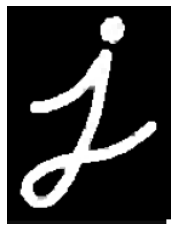

In [12]:
close = cv2.erode(close, kernel)
exibe_image(close)

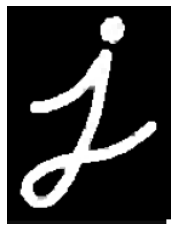

In [13]:
close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

exibe_image(close)

cv2.imshow('close',close)
cv2.waitKey(0)
cv2.destroyWindow('close')

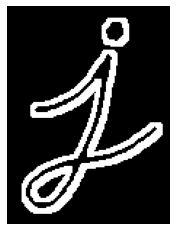

In [14]:
# gradiente 

gradiente = dilation - img_erosion

exibe_image(gradiente)

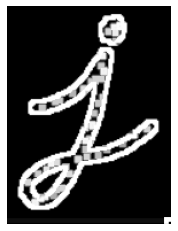

In [15]:
gradiente = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

exibe_image(gradiente)

Essa operação é a diferença entre dilatação e erosão.

